# protostars
## 06- `star_protostars.py` experiment 6
### II. Starfish outcomes

`Starfish` with the `star_protostars_Av.py` code

Full available spectral region

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp6/output/bb_absolute/run01/temp_emcee_chain.npy")

This experiment terminated early due to the metadata blobs bug (GitHub Issue #19), but ~4200 samples is adequately burned in, so we will just use a truncated subset for posteriors.

In [3]:
burned = ws[:, 3199:4199,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
from matplotlib.ticker import MaxNLocator

In [5]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$A_V$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

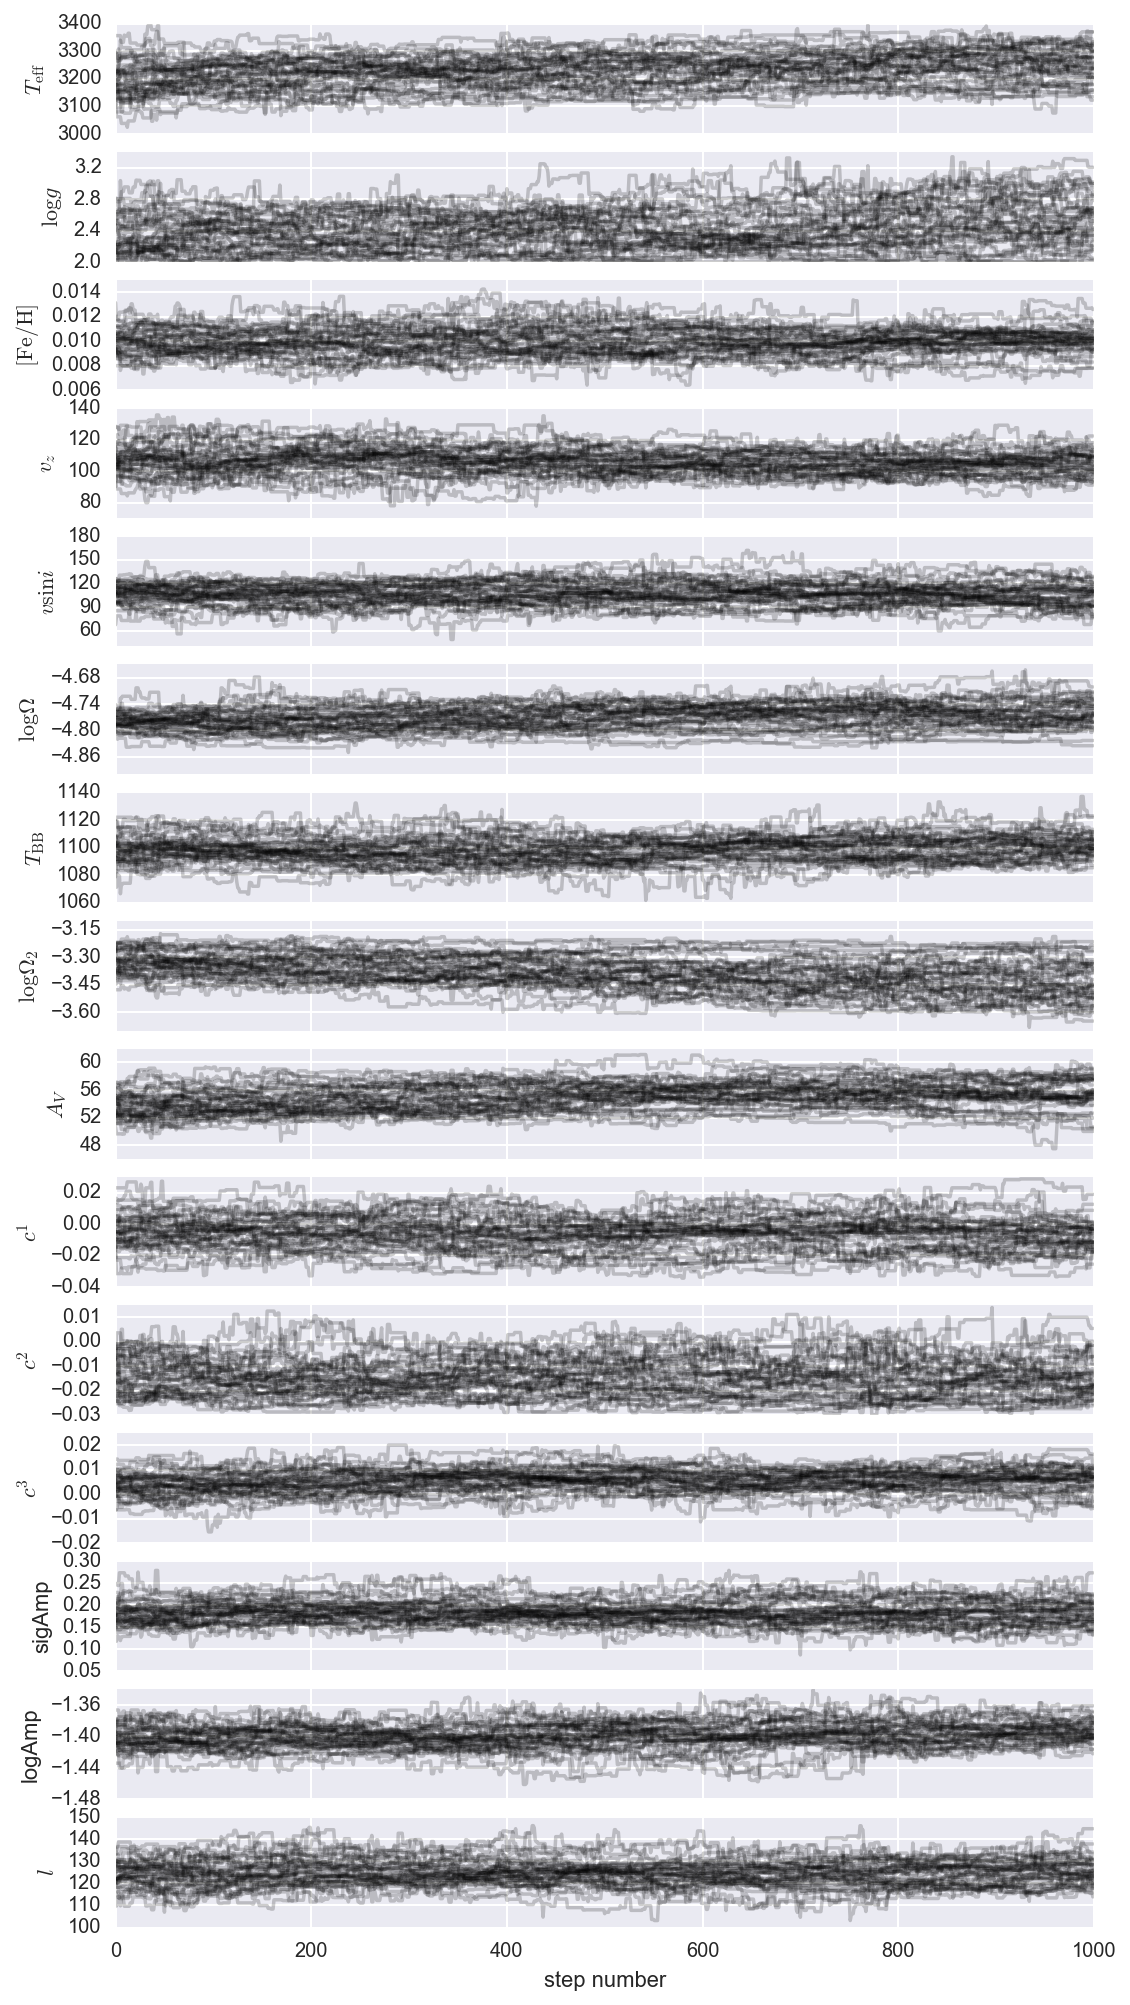

In [6]:
fig, axes = plt.subplots(15, 1, sharex=True, figsize=(8, 14))
for i in range(0, 15, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[14].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

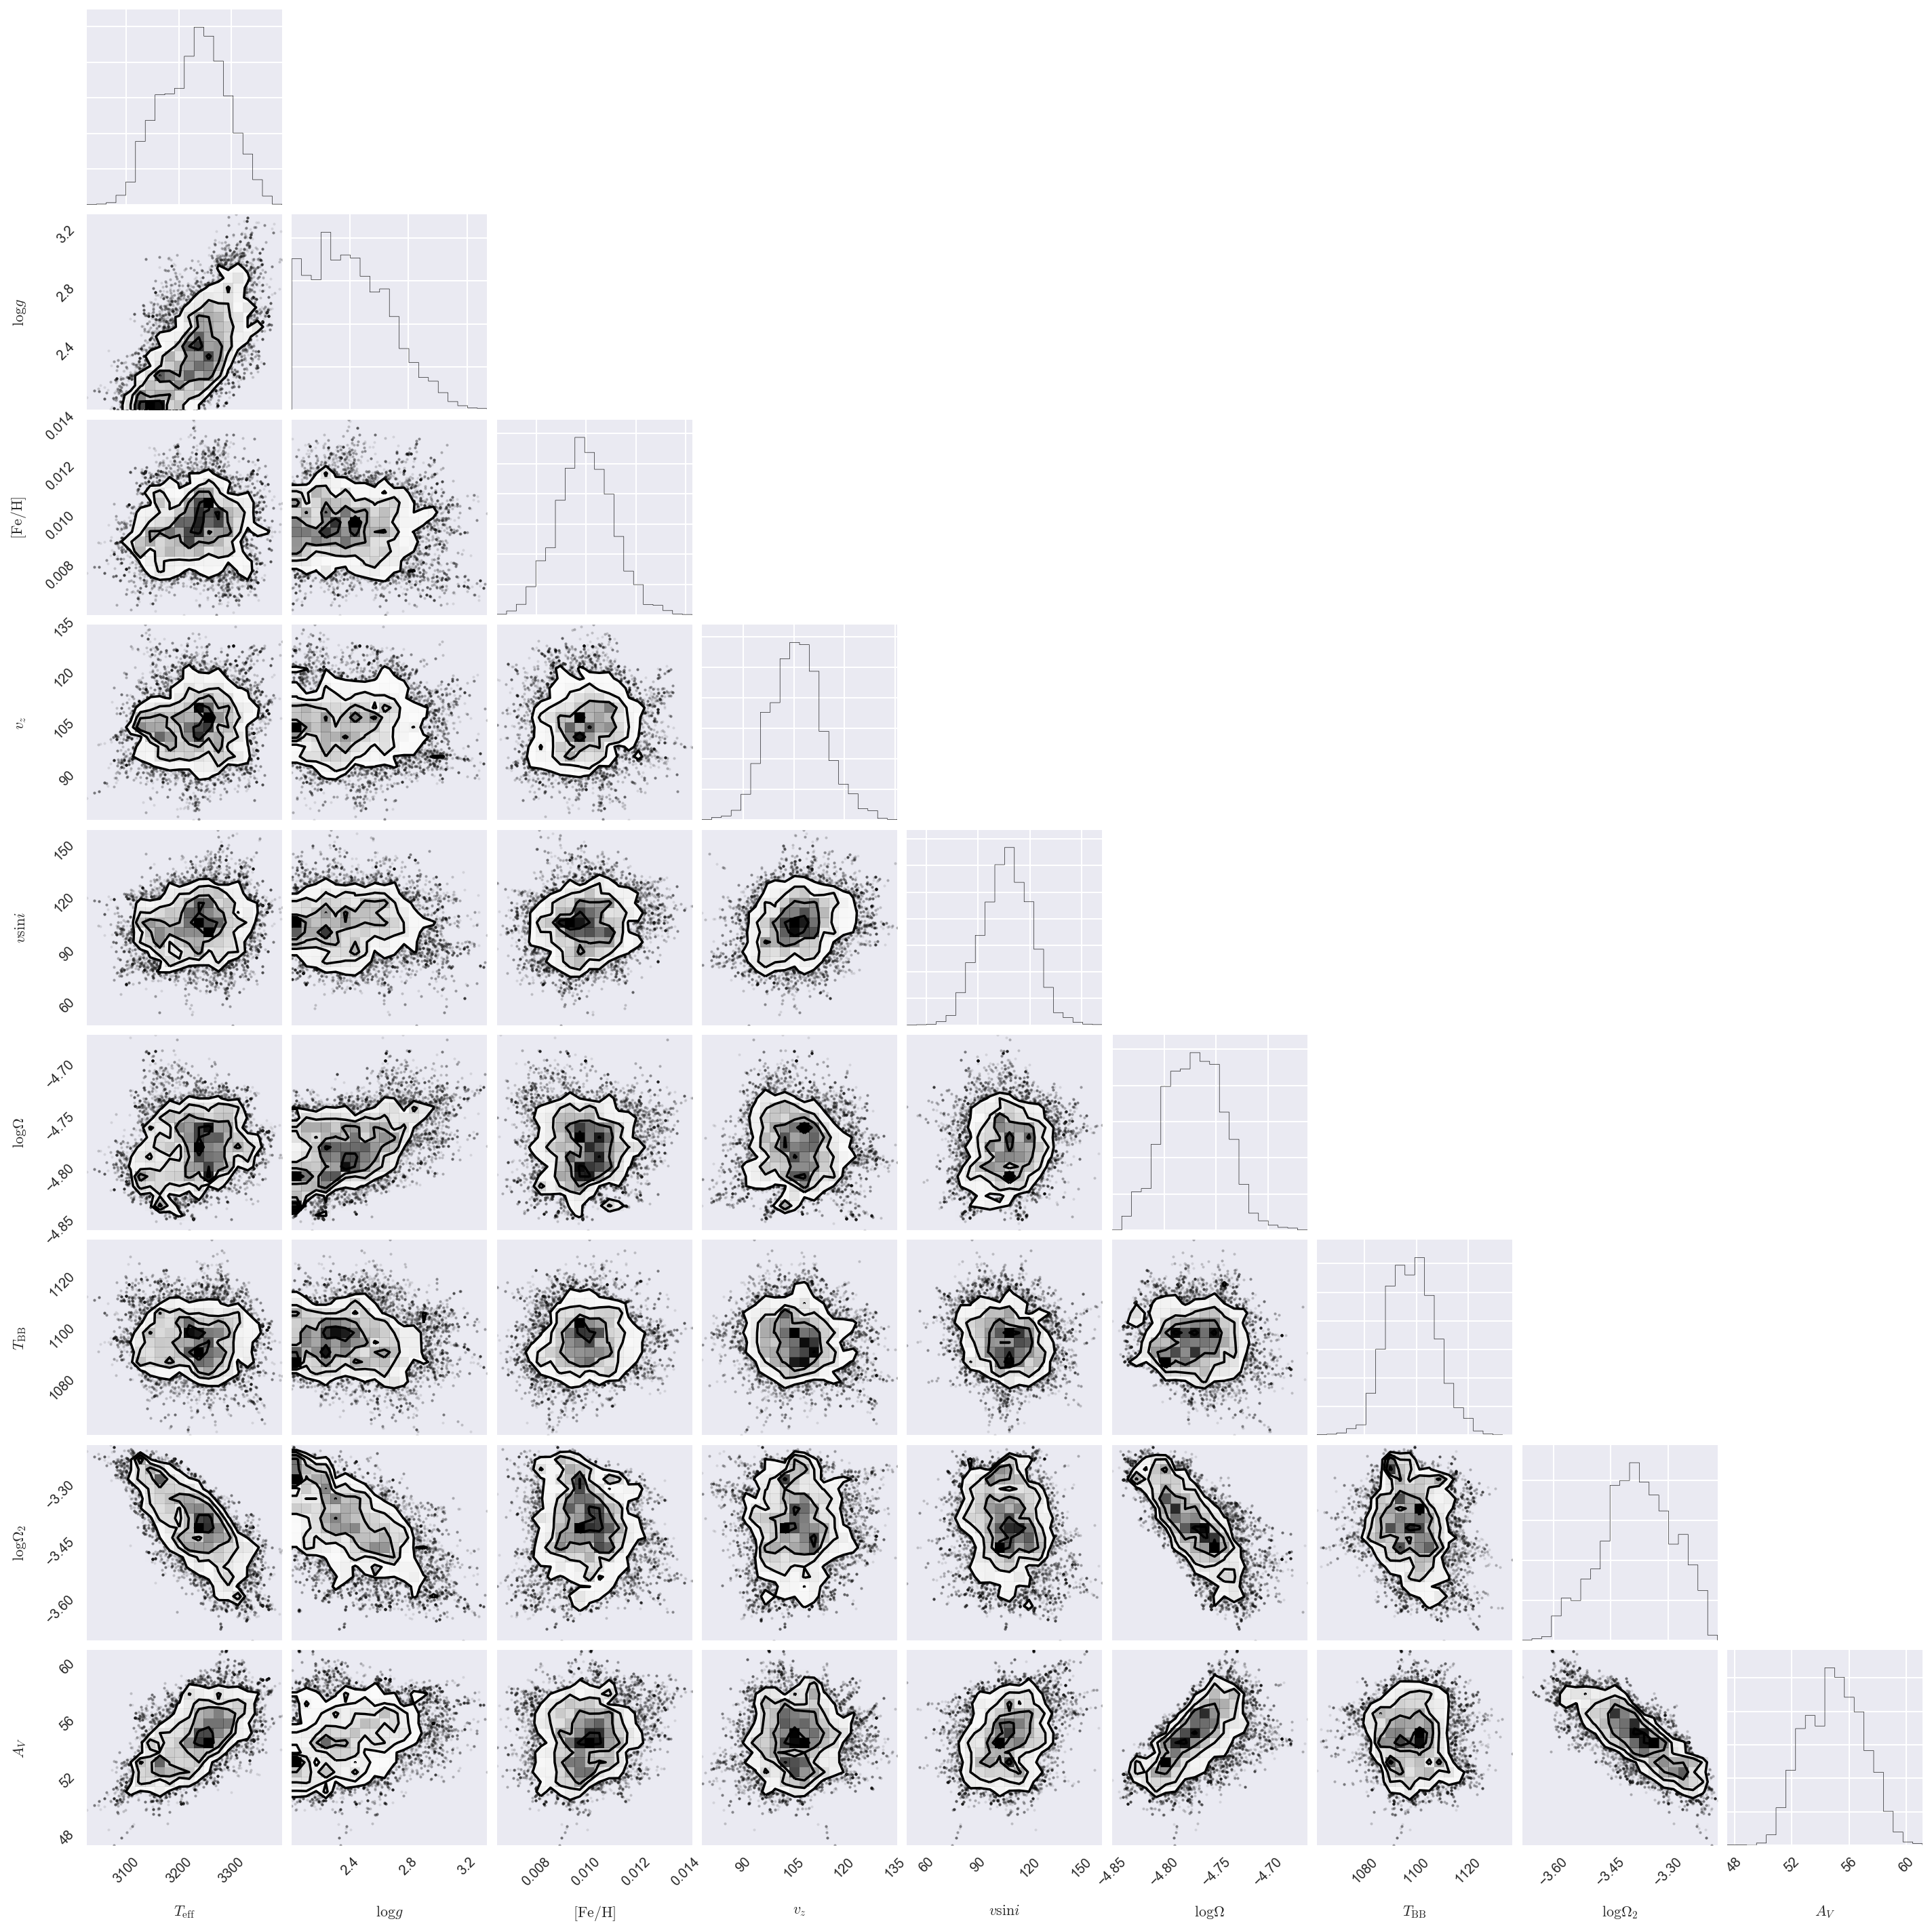

In [7]:
import corner
fig = corner.corner(fc[:, 0:9], labels=label[0:9])
fig.savefig('../plots/exp6_run01_corner.png', dpi=300)

```bash
gully at gigayear in ~/GitHub/protostars/sf/exp6/output/bb_absolute/run01 on master [+!?]
$ $protostars/code/star_protostars_Av.py --samples=5000 --incremental_save=100
keeping grid as is
Using the user defined prior in $protostars/sf/exp6/user_prior.py
2017 Apr 13, 3:44 PM: 99/5000 = 2.0%
2017 Apr 13, 3:48 PM: 199/5000 = 4.0%
[...]
2017 Apr 13, 5:59 PM: 3799/5000 = 76.0%
2017 Apr 13, 6:03 PM: 3899/5000 = 78.0%
2017 Apr 13, 6:06 PM: 3999/5000 = 80.0%
Traceback (most recent call last):
  File "/Users/gully/GitHub/protostars//code/star_protostars_Av.py", line 216, in <module>
    np.save('temp_raw_models.npy',sampler.blobs)
  File "//anaconda/envs/Starfish/lib/python3.5/site-packages/numpy/lib/npyio.py", line 491, in save
    pickle_kwargs=pickle_kwargs)
  File "//anaconda/envs/Starfish/lib/python3.5/site-packages/numpy/lib/format.py", line 573, in write_array
    pickle.dump(array, fp, protocol=2, **pickle_kwargs)
OSError: [Errno 22] Invalid argument
```

There seems to be a problem with saving the metadata blobs... Maybe the file was too big?  I saved the failed file as:  
**temp_emcee_chain_4k_failled.npy**  
in case we need it for forensics later.  The raw models file was only 4kB, so empty.

## Spectroscopy

In [8]:
import h5py

f = h5py.File("../data/reduced/S68N_NIRSPEC.hdf5", "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])

f.close()

In [9]:
raw_mods = np.load('../sf/exp6/output/bb_absolute/run01/raw_models.npy')

In [10]:
raw_mods.shape

(3, 40)

These are directly from the config file.

In [11]:
star, disk, scatAv, cheb = (raw_mods[0][3][i, :] for i in range(4))

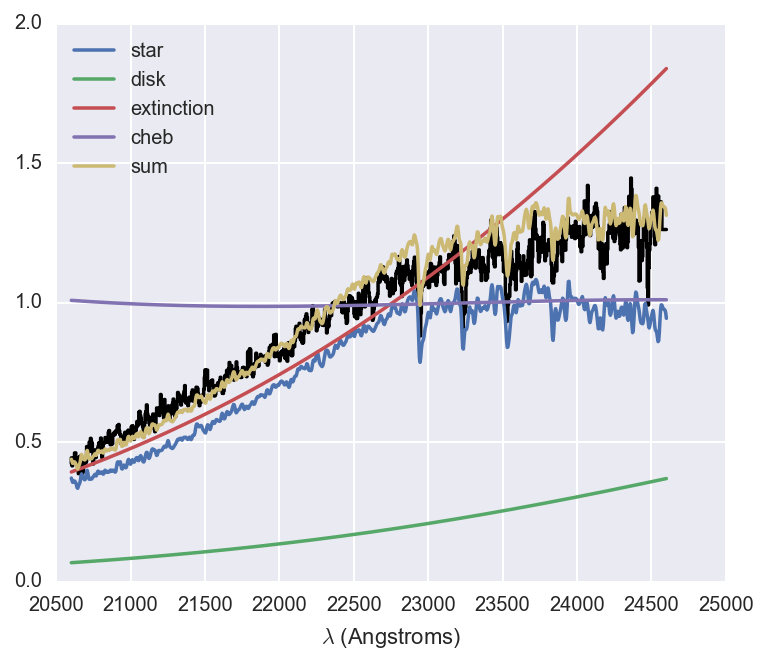

In [12]:
plt.figure(figsize=(6, 5))
plt.step(wl, fl, 'k')
plt.plot(wl, star, label = 'star')
plt.plot(wl, disk, label = 'disk')
plt.plot(wl, scatAv, label = 'extinction')
plt.plot(wl, cheb, label = 'cheb')
plt.plot(wl, star+disk, label = 'sum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.legend(loc='best')

Seems fine.